# Making Figures for GLM Tutorials

In [4]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.stats import regress, zscore
from nltools.data import Brain_Data, Design_Matrix
from nltools.stats import find_spikes 
from nltools.external import glover_hrf
from nilearn.plotting import view_img, glass_brain, plot_stat_map

netid = 'f00275v'
# output_dir = '/dartfs/rc/lab/P/Psych60/students_output/%s' % netid
# data_dir = '/dartfs/rc/lab/P/Psych60/data/brainomics_data/'

output_dir = '/Volumes/Psych60/students_output/%s' % netid
data_dir = '/Volumes/Psych60/data/brainomics_data/'

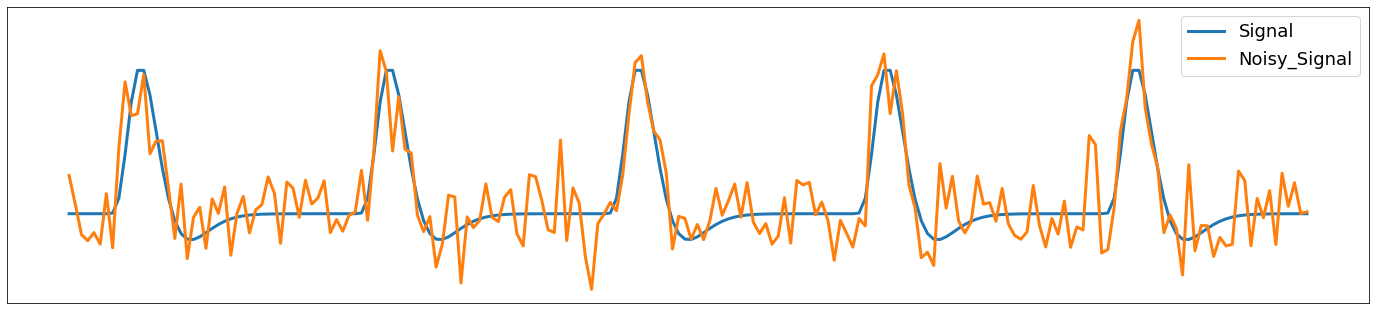

In [41]:
tr = 2
n_tr = 200
n_trial = 5
sigma = 0.05
amplitude = 1

def plot_timeseries(data, linewidth=3, labels=None, axes=True):
    f,a = plt.subplots(figsize=(20,5))
    a.plot(data, linewidth=linewidth)
    a.set_ylabel('Intensity', fontsize=18)
    a.set_xlabel('Time', fontsize=18)
    plt.tight_layout()
    if labels is not None:
        plt.legend(labels, fontsize=18)
    if not axes:
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)

def simulate_timeseries(n_tr=200, amplitude=1, tr=1, sigma=0.05):
    y = np.zeros(n_tr)
    y[np.arange(20, n_tr, int(n_tr/n_trial))] = amplitude

    hrf = glover_hrf(tr, oversampling=1)
    y = np.convolve(y, hrf, mode='same')
    epsilon = sigma*np.random.randn(n_tr)
    y = y + epsilon
    return y

sim1 = simulate_timeseries(sigma=0)
sim2 = simulate_timeseries(sigma=0.05)
# sim3 = simulate_timeseries(amplitude=2, sigma=0.05)
sim = np.vstack([sim1, sim2]).T
plot_timeseries(sim, linewidth=3, axes=False, labels=['Signal', 'Noisy_Signal'])
# plt.savefig(os.path.join(output_dir, 'sim_time.pdf'))

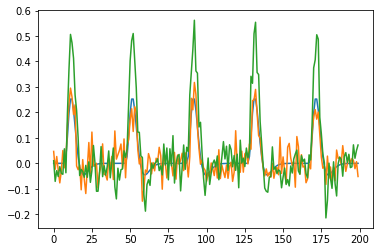

In [30]:
plt.plot(sim1)
plt.plot(sim2)
plt.plot(sim3)

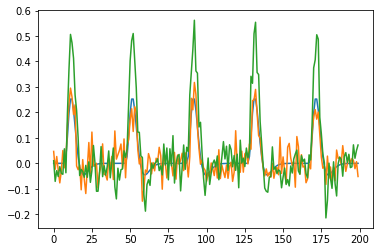

In [38]:
plt.plot(np.vstack([sim1, sim2, sim3]).T)